<a href="https://colab.research.google.com/github/EnnioSantos/Analise-de-Dados-com-Python/blob/main/Tratamento_de_Dados_Metereologicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Foi solicitado o tratamento desses dados dentro do seguinte dominio:
- Aparencia: Sol, Nublado e Chuva
- Temperatura: -130 a 130°F
- Umidade: 0 a 100
- Jogar: Sim/Não
- Tratar Valores N/A

In [19]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [20]:
db = pd.read_csv("/content/tempo.csv", sep = ";")

In [21]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Aparencia    14 non-null     object 
 1   Temperatura  14 non-null     int64  
 2   Umidade      13 non-null     float64
 3   Vento        13 non-null     object 
 4   Jogar        14 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 688.0+ bytes


Existem pelo menos 1 N/a em Umidade e 1n/a em Vento

In [22]:
db.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [23]:
#exploracao de dados categoricos

aparencia = db.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

Para o Modelo precisamos eliminar o "menos" e como é uma variavel categorica eu escolhi por mudar "menos "para "Chuva" que é o elemento que mais se repete

In [37]:
db.loc[db['Aparencia'] ==  'menos', 'Aparencia'] = "sol"
#visualiza o resultado
aparencia = db.groupby(['Aparencia']).size()
aparencia

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

<Axes: xlabel='Aparencia'>

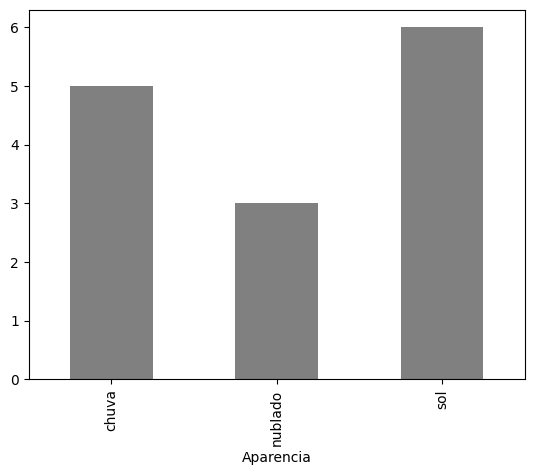

In [43]:
aparencia.plot.bar(color = 'gray')

# Tirar os N/A da coluna vento

In [38]:
vento = db.groupby(['Vento']).size()
vento

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [39]:
db['Vento'].isnull().sum()

0

In [40]:
#preenche NAs
db['Vento'].fillna('FALSO', inplace=True)

# Colocar Temperatura dentro do Dominio

In [41]:
#exploração dados numericos
db['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [52]:
db.loc[(db['Temperatura'] <  -130 )  | ( db['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [54]:
mediana = sts.median(db['Temperatura'])
mediana

73.5

In [56]:
db.loc[(db['Temperatura'] <  -130 )  | ( db['Temperatura'] >  130), 'Temperatura'] = mediana

In [57]:
db.loc[(db['Temperatura'] <  -130 )  | ( db['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


# Colocar Umidade dentro do Dominio e retirar N/A

In [42]:
db['Umidade'].describe()

count     14.000000
mean      89.464286
std       33.204763
min       65.000000
25%       71.250000
50%       85.250000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [31]:
db['Umidade'].isnull().sum()

1

In [34]:
mediana = sts.median(db['Umidade'])
mediana

85.5

In [35]:
db['Umidade'].fillna(mediana, inplace=True)

Text(0.5, 1.0, 'Umidade')

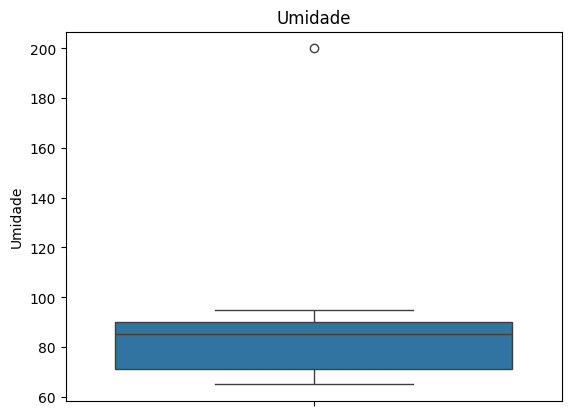

In [44]:
srn.boxplot(db['Umidade']).set_title('Umidade')

In [47]:
#visuliza de acordo com o dominio de acordo com o dominio
db.loc[(db['Umidade'] <  0 )  | ( db['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,FALSO,sim


In [49]:
#atualiza comm mediana
db.loc[(db['Umidade'] <  0 )  | ( db['Umidade'] >  100), 'Umidade'] = mediana

In [51]:
db.loc[(db['Umidade'] <  0 )  | ( db['Umidade'] >  100) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


Agora os dados estão dentro do dominio do modelo